In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random
import cv2
import re

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
# QR Code scan
def qrScanner ():
    
    cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
    detector = cv2.QRCodeDetector()
    data = None
    
    while True:
        _, img = cap.read()
        
        # detect and decode
        data,bbox, _ = detector.detectAndDecode(img)
        
        # check for a QR Code in the image
        if bbox is not None:
            # Image with lines
            for i in range(len(bbox)):
                cv2.line(img, tuple(bbox[i][0].astype(np.int32)), tuple(bbox[(i+1) % len(bbox)][0].astype(np.int32)), 
                         color=(255, 0, 0), thickness=2)
            if data:
                print("\n\n\n QR Code detected, URL:", data)
                break
        cv2.imshow("img", img)    
        if cv2.waitKey(1) == ord("q"):
            break
            
    cv2.waitKey(0)
#     cap.release()
    cv2.destroyAllWindows()
    return data

In [4]:
# tokenizing function
def sanitization(web):                      
    web = web.lower()
    token = []
    
    # remove / : - . using regex
    filtered = re.findall(r'[^/, ^:, ^., ^-]*', web)
    
    #remove empty strings if any
    while '' in filtered :
        filtered.remove('')
    
    # remove same words      
    token = list(set(no_dot_slash))
    
    # remove com    
    if 'com' in token:
        token.remove('com')      
    if 'www' in token:    
        token.remove('www')   
    if 'https' in token:    
        token.remove('https') 
    if 'http' in token:    
        token.remove('http')
        
    return token

In [5]:
# Reading Dataset
url = 'data_url.csv'                        
url_csv = pd.read_csv(url,',',error_bad_lines=False)                
url_df = pd.DataFrame(url_csv)                                                                                             
url_df = np.array(url_df)  
                   
random.shuffle(url_df)

urls = [d[0] for d in url_df]               # all urls 
y = [d[1] for d in url_df]                  # all tags corresponding to urls

In [6]:
vectorizer = TfidfVectorizer(tokenizer=sanitization)  # term-frequency and inverse-document-frequency
x = vectorizer.fit_transform(urls)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # train-test split

In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter = 1000)                  
lgr.fit(x_train, y_train)
score = lgr.score(x_test, y_test)
print("score: {0:.2f} %".format(100 * score))

score: 98.32 %


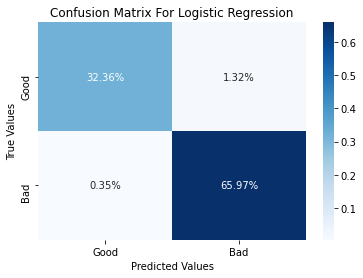

In [8]:
y_pred_lgr = lgr.predict(x_test)
cf_matrix1 = confusion_matrix(y_test,y_pred_lgr)    
    
ax= plt.subplot()
sns.heatmap(cf_matrix1/np.sum(cf_matrix1), annot=True, 
            fmt='.2%', cmap='Blues', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted Values');ax.set_ylabel('True Values'); 
ax.set_title('Confusion Matrix For Logistic Regression'); 
ax.xaxis.set_ticklabels(['Good', 'Bad']); ax.yaxis.set_ticklabels(['Good', 'Bad']);

In [16]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dct_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dct_classifier.fit(x_train, y_train)
score = dct_classifier.score(x_test, y_test)
print("score: {0:.2f} %".format(100 * score))

score: 99.22 %


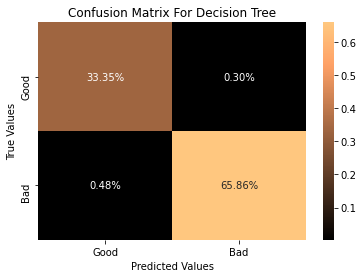

In [22]:
y_pred_decTree = dct_classifier.predict(x_test)
cf_matrix2 = confusion_matrix(y_test,y_pred_decTree)
ax= plt.subplot()
sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True, 
            fmt='.2%', cmap='copper', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted Values');ax.set_ylabel('True Values'); 
ax.set_title('Confusion Matrix For Decision Tree'); 
ax.xaxis.set_ticklabels(['Good', 'Bad']); ax.yaxis.set_ticklabels(['Good', 'Bad']);

In [ ]:
# Prediction of input QR Code
url = qrScanner()
x_predict = [url]
x_predict = vectorizer.transform(x_predict)
y_predict = lgr.predict(x_predict)
print (y_predict)